# Lezione 06

## Dario Pullia

Ci proponiamo di studiare il **modello di Ising 1D**. 

Il modello di Ising è il modello di un **magnete**, che idealizza una struttura cristallina (nel nostro caso 1D) composta da spin *up* e *down*. L'orientamento degli spin determina le caratteristiche fisiche del sistema.
L'energia del sistema si scrive:

$$H = -J\sum_{i=1}^N s_i s_{i+1}-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1})$$

dove J è una costante (caratteristica del sistema) di interazione tra spin, h è il campo magnetico e ${s_i}$ è un valore tra (-1,1) e rappresenta l'orientamento dello spin.

Evolvere il sistema nel nostro caso significa scegliere se rovesciare uno spin ad iterazione. Ci sono tecniche che permettono inversioni di gruppi adiacenti di spin che permettono di raggiungere configurazioni molto improbabili per le tecniche ad inversione singola.

Scegliamo di simulare un campione di 50 particelle ripetuto all'infinito usande le **PCB**.


#### Algoritmo di Metropolis

Ad ogni passaggio viene estratta casualmente una particella, ne si propone un *flip* e viene accettato con una probabilità $A(\nu|\mu)=min \left [1, \frac{p(\nu)}{p(\mu)} \right ]$. 
La probabilità di essere in una data configurazione è data dalla formula di Boltzmann $p(\mu)= \frac{e^{-\beta \ E_\mu}}{Z}$. 


L'algoritmo di Metropolis si dimostra efficace perchè nel rapporto tra le probabilità si elide la quantità Z che non si è in grado di calcolare. Inoltre $\frac{p(\nu)}{p(\mu)}= e^{-\beta \ (E_\nu - E_\mu)}=e^{-\beta \Delta E}$ e di conseguenza è sufficiente valutare solo la variazione di energia legata al singolo *spin-flip* $\Delta E= 2s_j [-J(s_{j-1} + s_{j+1}) + h]$.

#### Algoritmo di Gibbs

Il campionamento di Gibbs è concettualmente il più semplice campionamento lungo una catena di Markov. 
Ad ogni passaggio viene estratta una particella e **ne si impone l'orientamento** estraendone il valore con probabilità $$T(\nu|\mu)= \frac{p(s_j'= \pm 1)}{p(s_j=+1)+p(s_j=-1)}=\frac{1}{1+ \text{exp}\left(- \beta \Delta E    \right)}$$



#### Equilibrazione
Studiamo l'evoluzione dell'energia a partire da una configurazione completamente casuale. La configurazione più lontana da un ordinamento casuale è la configurazione più fredda, pertanto scegliamo di ottimizzare per questa configurazione.

Di seguito il grafico dell'energia ad ogni step, ottenuto imponendo il numero di passi per blocco L=1.


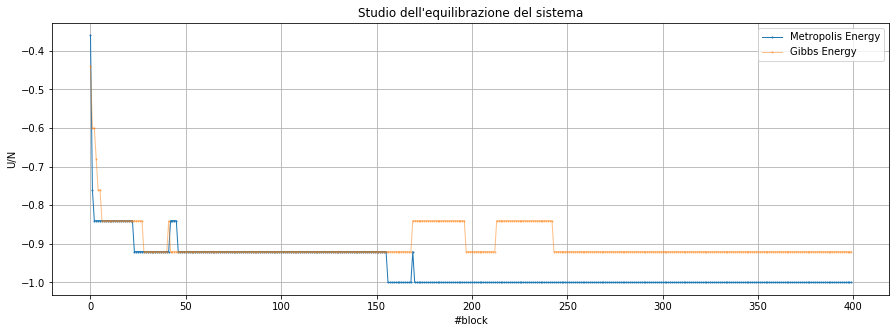

In [91]:
import numpy as np
import matplotlib.pyplot as plt


def AutoC(t, vec):
    appo1=0
    appo2=0
    appo3=0
    appo4=0
    appo5=0
    tmax=0
    tmax=vec.size
    for i in range(tmax-t):
        appo1+=vec[i]*vec[i+t]
        appo2+=vec[i]
        appo3+=vec[i+t]
    for i in range(tmax):
        appo4+=vec[i]*vec[i]
        appo5+=vec[i]
        
    return (appo1/(tmax-t) - appo2*appo3/((tmax-t)*(tmax-t)))/((appo4/tmax)-(appo5/tmax)**2)    






points=100
x=[]
for i in range(11):
    x.append(0.5+0.15*i)

T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th    
#Queste s stanno per short
Ts = np.linspace(0.5,2.0,num=11)
betas = 1/Ts
Js = 1.0
Nss = 50
ths = np.tanh(Js/Ts)
thNs= ths**Nss
chs = 1/ths    


fig = plt.figure(figsize=(15,5))

metro_Energy= np.loadtxt("dataeq/metropolis/outputs/0.500000output.ene.0.000000", usecols=(1,), delimiter=' ', unpack='true')
gibbs_Energy= np.loadtxt("dataeq/gibbs/outputs/0.500000output.ene.0.000000", usecols=(1,), delimiter=' ', unpack='true')


plt.errorbar(np.arange(400),metro_Energy[:400],label="Metropolis Energy", linewidth=1, marker="o" ,markersize=1)
plt.errorbar(np.arange(400),gibbs_Energy[:400],label="Gibbs Energy", linewidth=1, marker="o" ,markersize=1,alpha=0.5)

plt.title("Studio dell'equilibrazione del sistema")
plt.xlabel('#block')
plt.ylabel('U/N')
plt.grid()
plt.legend()




Si osserva che bastano poche iterazioni ($\sim 250$) per arrivare in uno stadio di equilibrio. 

Siccome scegliamo di simulare usando N=20 blocchi da L=10000 passi l'equilibrazione impatta molto poco sul risultato finale. Nonostante questo, i successivi risultati sono ottenuti a partire dalle configurazioni ottenute dall'equilibrazione. 
#### Autocorrelazione

Siccome utilizziamo catene di Markov è necessari controllare che i blocchi usati non risentano di autocorrelazione, a questo scopo mostriaiamo l'evoluzione dell'autocorrelazione dell'energia al variare di numero di passi di distanza. Si è scelto di studiare l'autocorrelazione della configurazione a temperatura minore poichè è la più lenta nei cambiamenti ed è quindi quella che risente più dell'autocorrelazione. 

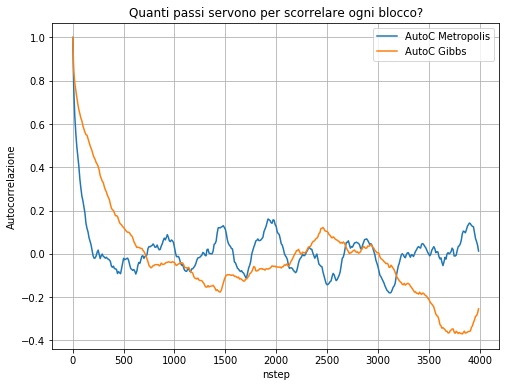

In [90]:
x = np.arange(400) 

fig=plt.figure(figsize=(8, 6))

Gibbs=[]
Metro=[]

for i in range(400):
    
    Metro.append(AutoC(10*i, metro_Energy[400:]))
    Gibbs.append(AutoC(10*i, gibbs_Energy[400:]))



plt.plot(10*x,Metro, label="AutoC Metropolis")
plt.plot(10*x,Gibbs,label="AutoC Gibbs")

plt.xlabel('nstep')
plt.ylabel('Autocorrelazione')
plt.title('Quanti passi servono per scorrelare ogni blocco?')
plt.grid(True)
plt.legend()
plt.show()


Si può osservare che le misure si scorrelano dopo $\sim 1000$ passi. Come anticipato, scegliamo passi di lunghezza L=10000 e pertanto l'autocorrelazione non è un problema.

### Esercizio 06.1




I parametri che vogliamo studiare in funzione della temperatura sono:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$




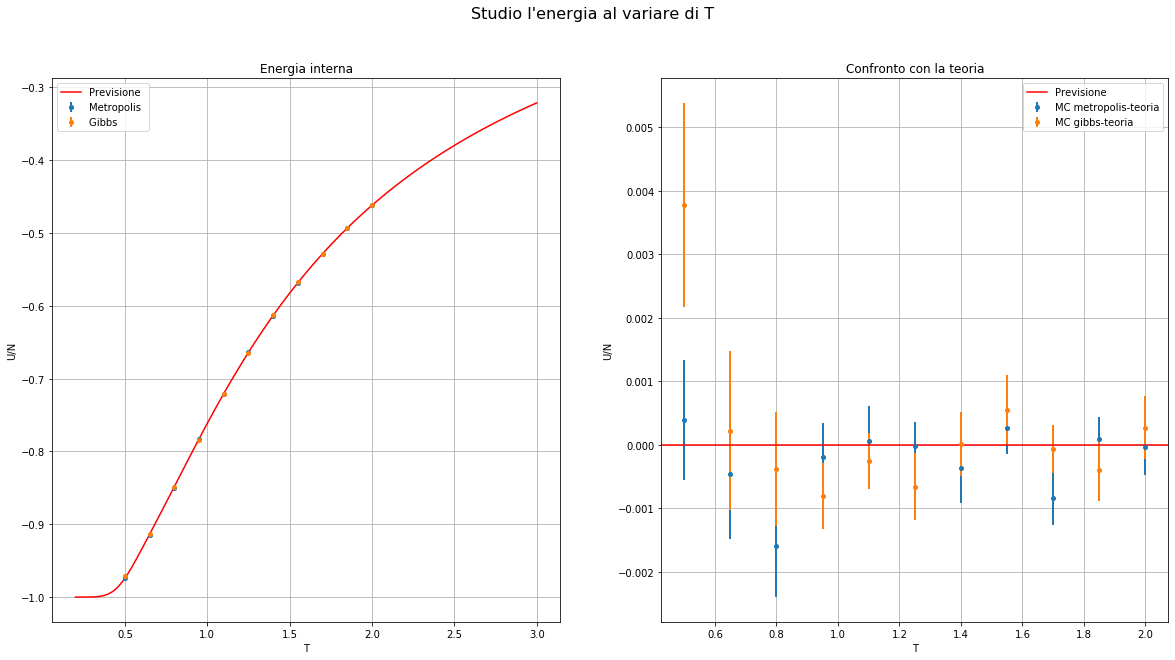

In [96]:
    
    
metro_Energy, metro_ErrEnergy= np.loadtxt("data01/metropolis/last_output.ene.0.000000", usecols=(2,3,), delimiter=' ', unpack='true')
gibbs_Energy, gibbs_ErrEnergy= np.loadtxt("data01/gibbs/last_output.ene.0.000000", usecols=(2,3,), delimiter=' ', unpack='true')





e = -J*( th + ch*thN )/( 1 + thN )



fig, ax = plt.subplots(1,2,figsize=(20, 10))
fig.suptitle("Studio l'energia al variare di T", fontsize=16)

ax[0].plot(T, e, label="Previsione",color = 'r',)
ax[0].errorbar(x,metro_Energy, yerr=metro_ErrEnergy,label="Metropolis ",linestyle="", linewidth=2, marker="o" ,markersize=4)
ax[0].errorbar(x,gibbs_Energy, yerr=gibbs_ErrEnergy,label="Gibbs ",linestyle="", linewidth=2, marker="o" ,markersize=4)
ax[0].set_title('Energia interna')
ax[0].set_xlabel('T')
ax[0].set_ylabel('U/N')
ax[0].grid()
ax[0].legend()




es = -Js*( ths + chs*thNs )/( 1 + thNs )


ax[1].axhline(y = 0, color = 'r', linestyle = '-',label="Previsione")
ax[1].errorbar(x,metro_Energy-es, yerr=metro_ErrEnergy, linestyle="",linewidth=2, marker="o" ,markersize=4, label="MC metropolis-teoria")
ax[1].errorbar(x,gibbs_Energy-es, yerr=gibbs_ErrEnergy, linestyle="",linewidth=2, marker="o" ,markersize=4, label="MC gibbs-teoria")
ax[1].set_title('Confronto con la teoria')
ax[1].set_xlabel('T')
ax[1].set_ylabel('U/N')
ax[1].grid()
ax[1].legend()


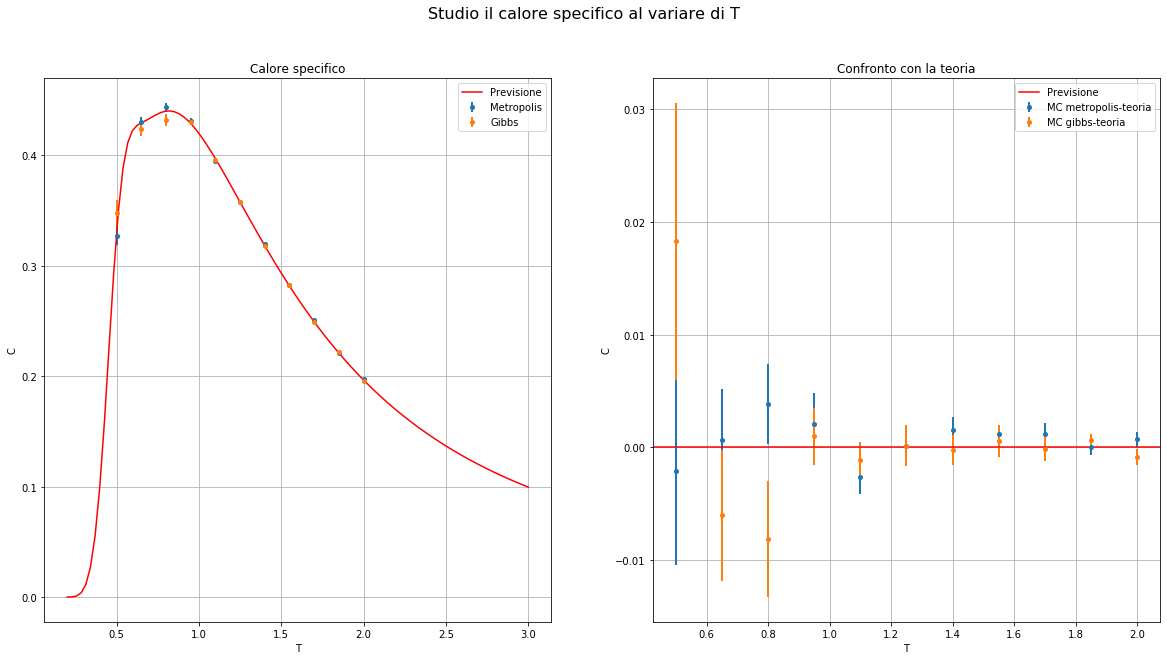

In [97]:

metro_Heat, metro_ErrHeat= np.loadtxt("data01/metropolis/last_output.heat.0.000000", usecols=(2,3,), delimiter=' ', unpack='true')
gibbs_Heat, gibbs_ErrHeat= np.loadtxt("data01/gibbs/last_output.heat.0.000000", usecols=(2,3,), delimiter=' ', unpack='true')


heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)




fig, ax = plt.subplots(1,2,figsize=(20, 10))
fig.suptitle("Studio il calore specifico al variare di T", fontsize=16)


ax[0].plot(T, heat, label="Previsione",color = 'r',)
ax[0].errorbar(x,metro_Heat, yerr=metro_ErrHeat,label="Metropolis",linestyle="", linewidth=2, marker="o" ,markersize=4)
ax[0].errorbar(x,gibbs_Heat, yerr=gibbs_ErrHeat,label="Gibbs",linestyle="", linewidth=2, marker="o" ,markersize=4)
ax[0].set_title('Calore specifico')
ax[0].set_xlabel('T')
ax[0].set_ylabel('C')
ax[0].grid()
ax[0].legend()




heats=((betas*Js)**2)*(((1+thNs+(Nss-1)*(ths**2)+(Nss-1)*(chs**2)*thNs)/(1+thNs))-Nss*((ths+chs*thNs)/(1+thNs))**2)


ax[1].axhline(y = 0, color = 'r', linestyle = '-',label="Previsione")
ax[1].errorbar(x,metro_Heat-heats, yerr=metro_ErrHeat, linestyle="",linewidth=2, marker="o" ,markersize=4, label="MC metropolis-teoria")
ax[1].errorbar(x,gibbs_Heat-heats, yerr=gibbs_ErrHeat, linestyle="",linewidth=2, marker="o" ,markersize=4, label="MC gibbs-teoria")
ax[1].set_title('Confronto con la teoria')
ax[1].set_xlabel('T')
ax[1].set_ylabel('C')
ax[1].grid()
ax[1].legend()



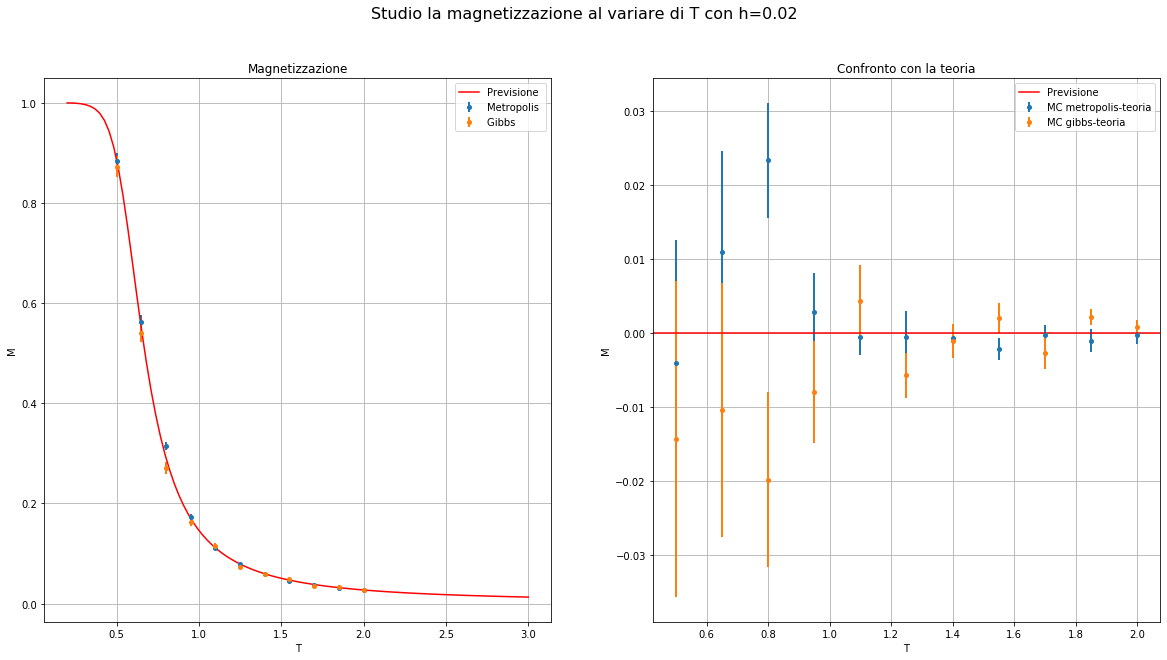

In [100]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
mag = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)




metro_Mag, metro_ErrMag= np.loadtxt("datah/metropolis/last_output.mag.0.020000", usecols=(2,3,), delimiter=' ', unpack='true')
gibbs_Mag, gibbs_ErrMag= np.loadtxt("datah/gibbs/last_output.mag.0.020000", usecols=(2,3,), delimiter=' ', unpack='true')




fig, ax = plt.subplots(1,2,figsize=(20, 10))
fig.suptitle("Studio la magnetizzazione al variare di T con h=0.02", fontsize=16)



ax[0].plot(T, mag, label="Previsione",color = 'r',)
ax[0].errorbar(x,metro_Mag, yerr=metro_ErrMag,label="Metropolis ",linestyle="", linewidth=2, marker="o" ,markersize=4)
ax[0].errorbar(x,gibbs_Mag, yerr=gibbs_ErrMag,label="Gibbs ",linestyle="", linewidth=2, marker="o" ,markersize=4)
ax[0].set_title('Magnetizzazione')
ax[0].set_xlabel('T')
ax[0].set_ylabel('M')
ax[0].grid()
ax[0].legend()


hs=0.02
bs = 1/Ts
l1s = np.exp(bs*Js)*np.cosh(bs*hs)+np.sqrt(np.exp(2*bs*Js)*np.cosh(bs*hs)*np.cosh(bs*hs)-2*np.sinh(2*bs*Js))
l2s = np.exp(bs*Js)*np.cosh(bs*hs)-np.sqrt(np.exp(2*bs*Js)*np.cosh(bs*hs)*np.cosh(bs*hs)-2*np.sinh(2*bs*Js))
Zs = l1s**Nss + l2s**Nss
mags = (np.exp(bs*Js)*np.sinh(bs*hs)*((l1s**(Nss-1))*(1+np.exp(bs*Js)*np.cosh(bs*hs)/np.sqrt(np.exp(2*bs*Js)*np.cosh(bs*hs)*np.cosh(bs*hs)-2*np.sinh(2*bs*Js))) 
        + (l2s**(Nss-1))*(1-np.exp(bs*Js)*np.cosh(bs*hs)/np.sqrt(np.exp(2*bs*Js)*np.cosh(bs*hs)*np.cosh(bs*hs)-2*np.sinh(2*bs*Js)))))/(Zs)





ax[1].axhline(y = 0, color = 'r', linestyle = '-',label="Previsione")
ax[1].errorbar(x,metro_Mag-mags, yerr=metro_ErrMag, linestyle="",linewidth=2, marker="o" ,markersize=4, label="MC metropolis-teoria")
ax[1].errorbar(x,gibbs_Mag-mags, yerr=gibbs_ErrMag, linestyle="",linewidth=2, marker="o" ,markersize=4, label="MC gibbs-teoria")
ax[1].set_title('Confronto con la teoria')
ax[1].set_xlabel('T')
ax[1].set_ylabel('M')
ax[1].grid()
ax[1].legend()






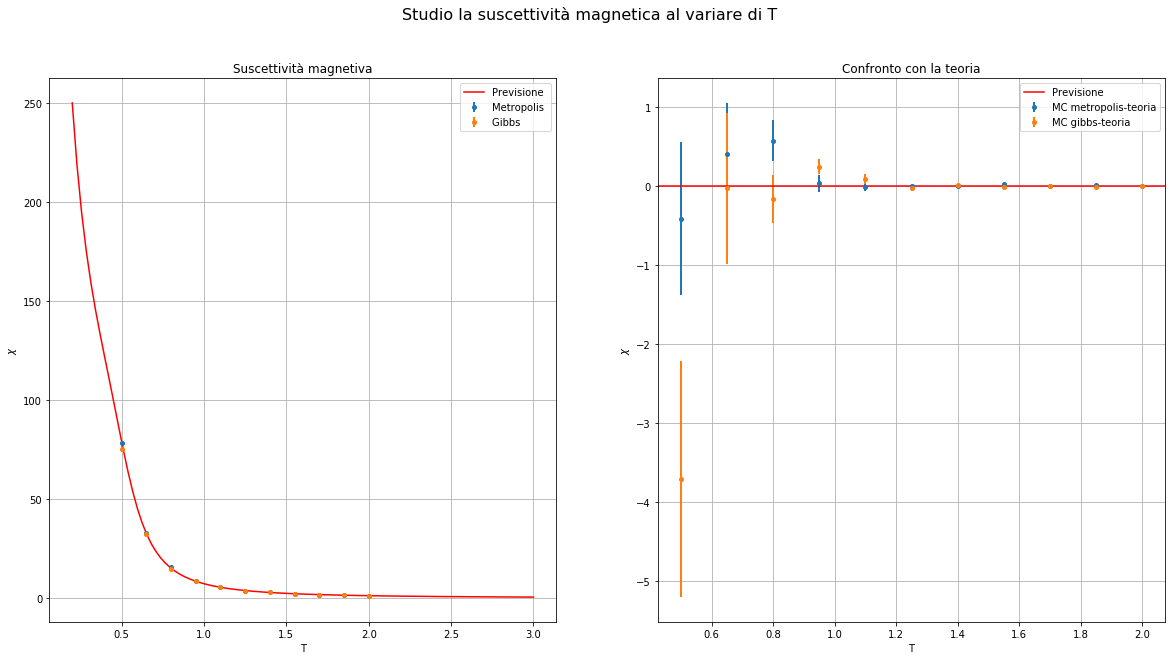

In [101]:

metro_Chi, metro_ErrChi= np.loadtxt("data01/metropolis/last_output.chi.0.000000", usecols=(2,3,), delimiter=' ', unpack='true')
gibbs_Chi, gibbs_ErrChi= np.loadtxt("data01/gibbs/last_output.chi.0.000000", usecols=(2,3,), delimiter=' ', unpack='true')


chi = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)




fig, ax = plt.subplots(1,2,figsize=(20, 10))
fig.suptitle("Studio la suscettività magnetica al variare di T", fontsize=16)


ax[0].plot(T, chi, label="Previsione",color = 'r',)
ax[0].errorbar(x,metro_Chi, yerr=metro_ErrChi,label="Metropolis ",linestyle="", linewidth=2, marker="o" ,markersize=4)
ax[0].errorbar(x,gibbs_Chi, yerr=gibbs_ErrChi,label="Gibbs ",linestyle="", linewidth=2, marker="o" ,markersize=4)
ax[0].set_title('Suscettività magnetiva')
ax[0].set_xlabel('T')
ax[0].set_ylabel('$\chi$')
ax[0].grid()
ax[0].legend()




chis = betas*np.exp(2*betas*Js)*(1-thNs)/(1+thNs)


ax[1].axhline(y = 0, color = 'r', linestyle = '-',label="Previsione")
ax[1].errorbar(x,metro_Chi-chis, yerr=metro_ErrChi, linestyle="",linewidth=2, marker="o" ,markersize=4, label="MC metropolis-teoria")
ax[1].errorbar(x,gibbs_Chi-chis, yerr=gibbs_ErrChi, linestyle="",linewidth=2, marker="o" ,markersize=4, label="MC gibbs-teoria")
ax[1].set_title('Confronto con la teoria')
ax[1].set_xlabel('T')
ax[1].set_ylabel('$\chi$')
ax[1].grid()
ax[1].legend()


Tutti i risultati presentati sono compatibili con le predizione teoriche entro al più poche sigma.